# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [1]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

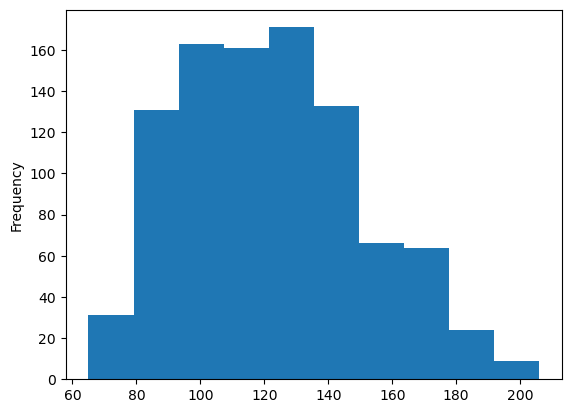

In [2]:
df['bpm'].plot(kind='hist')

In [3]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

<Axes: ylabel='count'>

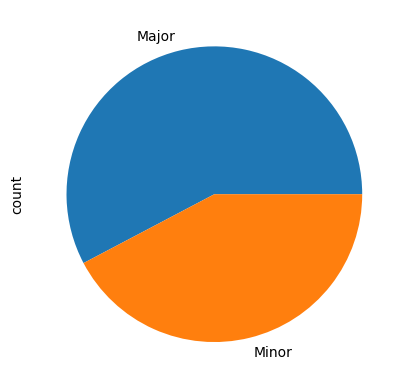

In [4]:
df['mode'].value_counts().plot(kind='pie')

In [5]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

In [6]:

filtered_df = df.loc[(df['bpm'] >= 85) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [14]:
df[['bpm', 'danceability_%', 'energy_%',
    'acousticness_%', 'speechiness_%']].describe()

,bpm,danceability_%,energy_%,acousticness_%,speechiness_%
count,953.000000,953.00000,953.000000,953.000000,953.000000
mean,122.540399,66.96957,64.279119,27.057712,10.131165
std,28.057802,14.63061,16.550526,25.996077,9.912888
min,65.000000,23.00000,9.000000,0.000000,2.000000
25%,100.000000,57.00000,53.000000,6.000000,4.000000
50%,121.000000,69.00000,66.000000,18.000000,6.000000
75%,140.000000,78.00000,77.000000,43.000000,11.000000
max,206.000000,96.00000,97.000000,97.000000,64.000000


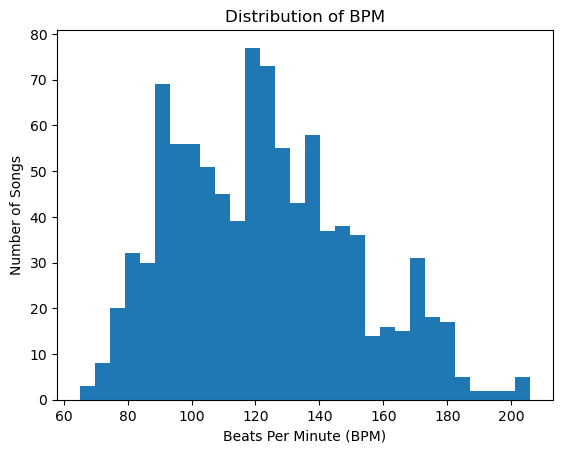

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64


In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['bpm'], bins=30)
plt.title('Distribution of BPM')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Number of Songs')
plt.show()

print(df['bpm'].describe())


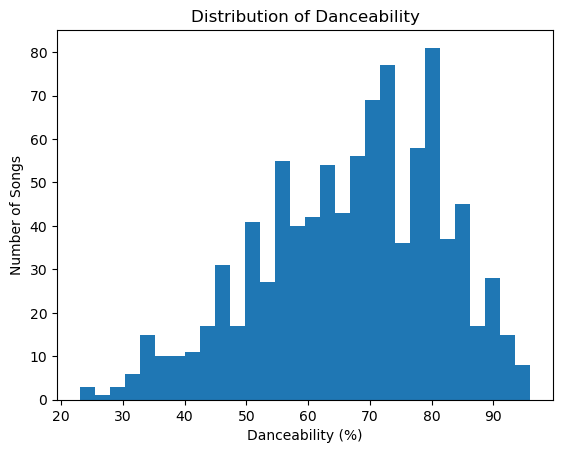

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64


In [18]:
plt.figure()
plt.hist(df['danceability_%'], bins=30)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Number of Songs')
plt.show()

print(df['danceability_%'].describe())


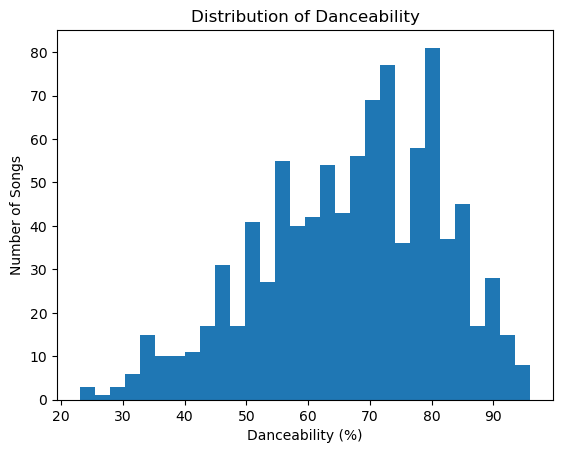

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64


In [19]:
plt.figure()
plt.hist(df['danceability_%'], bins=30)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Number of Songs')
plt.show()

print(df['danceability_%'].describe())


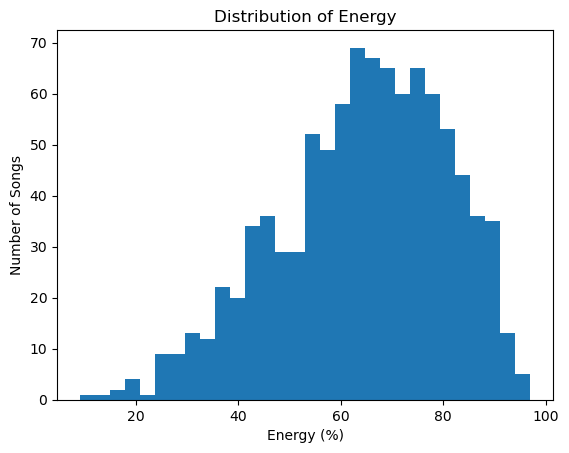

count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64


In [20]:
plt.figure()
plt.hist(df['energy_%'], bins=30)
plt.title('Distribution of Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Number of Songs')
plt.show()

print(df['energy_%'].describe())


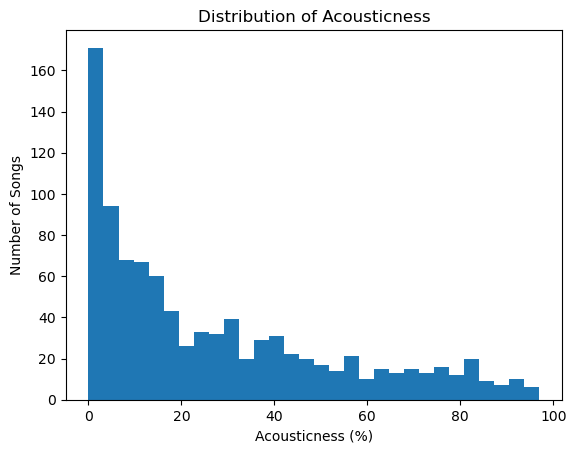

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64


In [21]:
plt.figure()
plt.hist(df['acousticness_%'], bins=30)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness (%)')
plt.ylabel('Number of Songs')
plt.show()

print(df['acousticness_%'].describe())


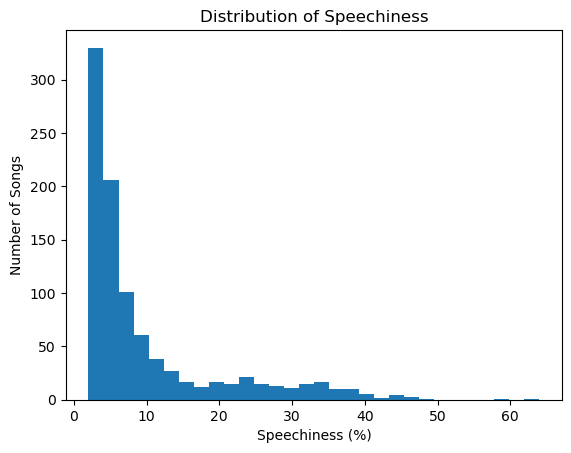

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64


In [22]:
plt.figure()
plt.hist(df['speechiness_%'], bins=30)
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness (%)')
plt.ylabel('Number of Songs')
plt.show()

print(df['speechiness_%'].describe())


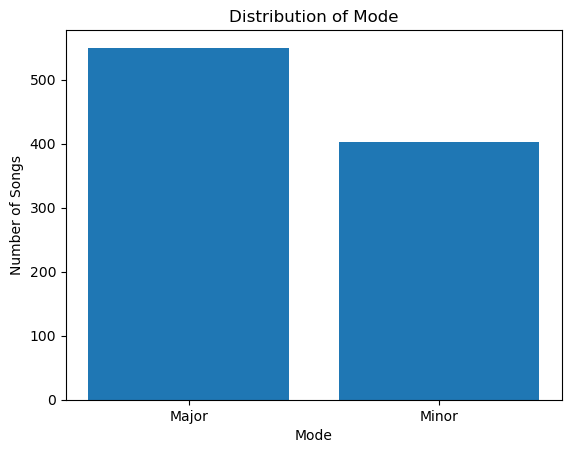

mode
Major    550
Minor    403
Name: count, dtype: int64


In [23]:
mode_counts = df['mode'].value_counts()

plt.figure()
plt.bar(mode_counts.index, mode_counts.values)
plt.title('Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.show()

print(mode_counts)


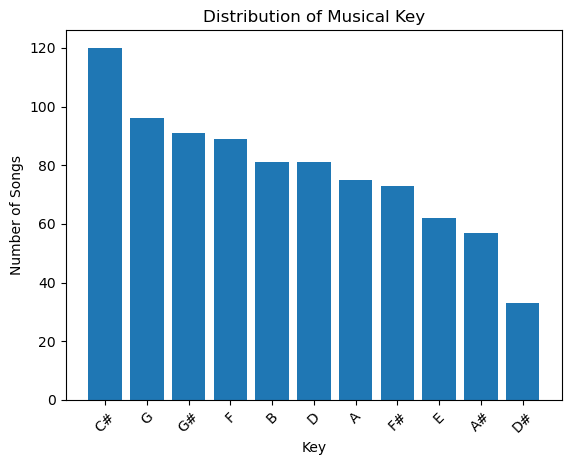

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64


In [24]:
key_counts = df['key'].value_counts()

plt.figure()
plt.bar(key_counts.index, key_counts.values)
plt.title('Distribution of Musical Key')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

print(key_counts)


In [25]:
# Calculate quartile ranges for each numeric feature

bpm_min = df['bpm'].quantile(0.25)
bpm_max = df['bpm'].quantile(0.75)

dance_min = df['danceability_%'].quantile(0.25)
dance_max = df['danceability_%'].quantile(0.75)

energy_min = df['energy_%'].quantile(0.25)
energy_max = df['energy_%'].quantile(0.75)

acoustic_min = df['acousticness_%'].quantile(0.25)
acoustic_max = df['acousticness_%'].quantile(0.75)

speech_min = df['speechiness_%'].quantile(0.25)
speech_max = df['speechiness_%'].quantile(0.75)

print("BPM range:", bpm_min, "to", bpm_max)
print("Danceability range:", dance_min, "to", dance_max)
print("Energy range:", energy_min, "to", energy_max)
print("Acousticness range:", acoustic_min, "to", acoustic_max)
print("Speechiness range:", speech_min, "to", speech_max)


BPM range: 100.0 to 140.0
Danceability range: 57.0 to 78.0
Energy range: 53.0 to 77.0
Acousticness range: 6.0 to 43.0
Speechiness range: 4.0 to 11.0


In [26]:
# Most common key
target_key = df['key'].value_counts().idxmax()

# Most common mode
target_mode = df['mode'].value_counts().idxmax()

print("Most common key:", target_key)
print("Most common mode:", target_mode)


Most common key: C#
Most common mode: Major


In [33]:
filtered_df = df.loc[
    (df['bpm'].between(bpm_min, bpm_max)) &
    (df['danceability_%'].between(dance_min, dance_max)) &
    (df['energy_%'].between(energy_min, energy_max)) &
    (df['acousticness_%'].between(acoustic_min, acoustic_max)) &
    (df['speechiness_%'].between(speech_min, speech_max)) &
    (df['key'] == target_key) &
    (df['mode'] == target_mode)
]

print("Number of songs matching criteria:", len(filtered_df))


Number of songs matching criteria: 2


In [34]:
# Sort by streams (proxy for popularity)
top_hits = filtered_df.sort_values('streams', ascending=False)

# Display most popular matching songs
print(top_hits[['track_name',
                'artist(s)_name',
                'streams']].head(20))


             track_name artist(s)_name     streams
660  Ginseng Strip 2002      Yung Lean   240769997
518        Need To Know       Doja Cat  1042568408


In [35]:
# Convert to string first (ensures .str methods work safely)
df['streams'] = df['streams'].astype(str)

# Remove commas if present
df['streams'] = df['streams'].str.replace(',', '', regex=False)

# Convert to numeric (invalid values become NaN)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Drop any rows where conversion failed
df = df.dropna(subset=['streams'])

# Convert to integer
df['streams'] = df['streams'].astype(int)

# Confirm fix
print("streams dtype:", df['streams'].dtype)
print(df['streams'].describe())


streams dtype: int64
count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


In [36]:
# Create popularity rank (1 = most streamed)
df['stream_rank'] = df['streams'].rank(ascending=False, method='min').astype(int)

# Rebuild filtered_df to include rank
filtered_df = df.loc[filtered_df.index].copy()

print(filtered_df[['track_name',
                   'artist(s)_name',
                   'streams',
                   'stream_rank']])


             track_name artist(s)_name     streams  stream_rank
518        Need To Know       Doja Cat  1042568408          148
660  Ginseng Strip 2002      Yung Lean   240769997          541


In [37]:
# Identify the most streamed song (objectve smash hit)
smash = df.sort_values('streams', ascending=False).iloc[0]

print("Smash hit according to dataset:")
print(smash[['track_name',
             'artist(s)_name',
             'streams',
             'bpm',
             'key',
             'mode',
             'danceability_%',
             'energy_%',
             'acousticness_%',
             'speechiness_%']])


Smash hit according to dataset:
track_name        Blinding Lights
artist(s)_name         The Weeknd
streams                3703895074
bpm                           171
key                            C#
mode                        Major
danceability_%                 50
energy_%                       80
acousticness_%                  0
speechiness_%                   7
Name: 55, dtype: object


In [38]:
# Compare smash hit to quartile ranges

features = ['bpm',
            'danceability_%',
            'energy_%',
            'acousticness_%',
            'speechiness_%']

q1 = df[features].quantile(0.25)
q3 = df[features].quantile(0.75)

comparison = pd.DataFrame({
    'smash_value': smash[features],
    'Q1': q1,
    'Q3': q3
})

comparison['inside_typical_range'] = (
    (comparison['smash_value'] >= comparison['Q1']) &
    (comparison['smash_value'] <= comparison['Q3'])
)

print("Key / Mode:", smash['key'], "/", smash['mode'])
print(comparison)


Key / Mode: C# / Major
               smash_value     Q1      Q3  inside_typical_range
bpm                    171  99.75  140.25                 False
danceability_%          50  57.00   78.00                 False
energy_%                80  53.00   77.00                 False
acousticness_%           0   6.00   43.00                 False
speechiness_%            7   4.00   11.00                  True


## Final Results / Answers

### 1) What values would make a song a “guaranteed smash hit” (based on this dataset)?

**Important limitation:** This dataset cannot truly *guarantee* a smash hit—at best, we can describe a **typical** (most common) “hit” profile based on the distributions (histograms) and quartiles (Q1–Q3). The criteria below describe what is **most common** among songs in the dataset, not what guarantees maximum popularity.

Using the **middle 50% (Q1–Q3)** as the “typical” range for quantitative features and the **most frequent** values for categorical features:

- **BPM:** approximately **99.75 to 140.25**
- **Key:** **C#** (most common key)
- **Mode:** **Major** (most common mode)
- **Danceability:** approximately **57 to 78**
- **Energy:** approximately **53 to 77**
- **Speechiness:** approximately **4 to 11**
- **Acousticness:** approximately **6 to 43**

These ranges reflect “statistically typical” songs in the dataset.

---

### 2) Songs matching ALL criteria + were they actually popular?

Using a large language model, we wrote code to filter the dataset using the criteria above (Q1–Q3 ranges + most common key/mode). The code found **2** songs meeting *all* criteria:

- **Need To Know — Doja Cat**
  - Streams: **1,042,568,408**
  - Stream rank: **148 out of 953** (top ~15%)
  - Interpretation: **popular**, though not the single biggest “smash hit” in the dataset.

- **Ginseng Strip 2002 — Yung Lean**
  - Streams: **240,769,997**
  - Stream rank: **541 out of 953** (lower half)
  - Interpretation: **not especially popular** relative to the dataset.

**Conclusion:** The “typical hit profile” does **not** reliably produce the most popular songs. It produced one moderately high-popularity song and one lower-popularity song.

---

### 3) Smash hit comparison: How does a true smash hit compare to typical songs?

We selected the most streamed song in the dataset as an objective “smash hit”:

- **Blinding Lights — The Weeknd**
  - Streams: **3,703,895,074**
  - BPM: **171**
  - Key / Mode: **C# / Major**
  - Danceability: **50**
  - Energy: **80**
  - Acousticness: **0**
  - Speechiness: **7**

We compared its values to the dataset’s typical (Q1–Q3) ranges:

- **BPM (171)** vs typical **99.75–140.25** → **above typical range**
- **Danceability (50)** vs typical **57–78** → **below typical range**
- **Energy (80)** vs typical **53–77** → **above typical range**
- **Acousticness (0)** vs typical **6–43** → **below typical range**
- **Speechiness (7)** vs typical **4–11** → **inside typical range**
- **Key/Mode:** **C# / Major** matches the most common categories

**Conclusion:** The biggest smash hit in the dataset is **not “average”** across features. It is more **extreme** in multiple dimensions (very fast tempo, higher energy, very low acousticness, lower danceability) while still matching the most common key and mode. This suggests that maximum popularity may come from a mix of common structure (key/mode) plus standout or extreme values in other features.
